In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats


In [33]:
red_wine_original = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv', sep=';')
white_wine_original= pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep=';')

In [34]:
white_wine=white_wine_original.copy()
red_wine=red_wine_original.copy()

# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: '0low'
if value <= 5 else '1medium'
if value <= 7 else '2high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['0low', '1medium', '2high'])

# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: '0low'
if value <= 5 else '1medium'
if value <= 7 else '2high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['0low', '1medium', '2high'])

white_wine_to_concat=white_wine.copy()
white_wine_to_concat['color']='white'
red_wine_to_concat=red_wine.copy()
red_wine_to_concat['color']='red'

frames = [red_wine_to_concat, white_wine_to_concat]


wines = pd.concat(frames)


In [35]:
wines.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Remove Outliers/ legally not acceptable wine

- __Volatile acidity:__    In the U.S, the legal limits of Volatile Acidity are 1.2 g/L for red table wine and 1.1 g/L for white table wine. 

- __Total sulfur dioxide:__   There are legal limits for sulfur levels in wines: in the EU, red wines can only have 160mg/L, while white and rose wines can have about 210mg/L. Sweet wines are allowed to have 400mg/L. For the US, the legal limits are set at 350mg/L, and for Australia, this is 250mg/L.

- __pH:__   Less than 7 are acidic, while solutions with a pH greater than 7 are basic. With a pH of 7, pure water is neutral. Most wines have a pH between 2.9 and 3.9 and are therefore acidic.



### Find wines out of legal limit

In [36]:
count_outliers=wines[wines['volatile acidity']>1.1].shape #8 rows
print(count_outliers)
display_outliers=wines[wines['volatile acidity']>1.1]
print(display_outliers)

count_outliers=wines[wines['total sulfur dioxide']>350].shape #2
print(count_outliers)
wines[(wines['total sulfur dioxide']>210)&(wines['color']=='red')]
wines[(wines['total sulfur dioxide']>400)]

(8, 14)
      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
38              5.7             1.130         0.09            1.50      0.172   
126             8.2             1.330         0.00            1.70      0.081   
127             8.1             1.330         0.00            1.80      0.082   
672             9.8             1.240         0.34            2.00      0.079   
690             7.4             1.185         0.00            4.25      0.097   
724             7.5             1.115         0.10            3.10      0.086   
1299            7.6             1.580         0.00            2.10      0.137   
1312            8.0             1.180         0.21            1.90      0.083   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
38                    7.0                  19.0  0.99400  3.50       0.48   
126                   3.0                  12.0  0.99640  3.53       0.49   
127                   3.0      

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,color
4745,6.1,0.26,0.25,2.9,0.047,289.0,440.0,0.99314,3.44,0.64,10.5,3,0low,white


### Remove non-legal and outlier

In [37]:
#get index of outliers
get_index= wines.index[wines['volatile acidity']>1.1].tolist()
print(get_index)

#drop outliers
wines_without_outliers=wines.drop(index=get_index, axis=0)

# check if any outliers remained
wines_without_outliers.index[wines_without_outliers['volatile acidity']>1.1].tolist()


[38, 126, 127, 672, 690, 724, 1299, 1312]


[]

## One-Hot Encoder

for nominal categories
/ the input values X.

In [38]:
from sklearn.preprocessing import OneHotEncoder

#cheque for unique values in color column
wines_without_outliers['color'].unique()

enc=OneHotEncoder()


# create 0, 1 arrays from colors
feat_arr=enc.fit_transform(wines_without_outliers[['color']]).toarray()

# get arrays
labels = enc.categories_
print(labels)

# create datafram from colors and labels
features= pd.DataFrame(feat_arr, columns=['red', 'white'])

print(features.head())

# add encoded color columns to df
wines_ml=wines_without_outliers.reset_index(drop=True)


enc_wines_ml=pd.concat([wines_ml, features], axis=1)

# drop original color column
enc_wines_ml=enc_wines_ml.drop('color', axis=1)






enc_wines_ml.head()





[array(['red', 'white'], dtype=object)]
   red  white
0  1.0    0.0
1  1.0    0.0
2  1.0    0.0
3  1.0    0.0
4  1.0    0.0


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,red,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0low,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0low,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0low,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1medium,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0low,1.0,0.0


## Ordinal encoder

 encode ordinal data /  the target value y.

In [39]:
# from sklearn.preprocessing import OrdinalEncoder

# #cheque for unique values in quality_label column

# enc_wines_ml['quality_label'].unique()

# X = [['low', 'medium', 'high']]
# oe = OrdinalEncoder(categories=X) #define order 


# oe.fit(enc_wines_ml[['quality_label']])

# oe.categories_

# df_transformed_quality=pd.DataFrame(oe.transform(enc_wines_ml[['quality_label']]))

# enc_wines_ml2=enc_wines_ml.copy()

# #replace quality label with encoded values
# enc_wines_ml2['quality_label']=df_transformed_quality



# enc_wines_ml2.head()














# Label encoder

- encode ordinal data
- for the target value y.

In [40]:
from sklearn.preprocessing import LabelEncoder

#cheque for unique values in quality_label column

enc_wines_ml['quality_label'].unique()


le = LabelEncoder()


le.fit(enc_wines_ml[['quality_label']])

print(le.classes_)

df_transformed_quality=pd.DataFrame(le.transform(enc_wines_ml[['quality_label']]))

#print(df_transformed_quality)

enc_wines_ml2=enc_wines_ml.copy()

#print(enc_wines_ml2['quality_label'])

#replace quality label with encoded values
enc_wines_ml2['quality_label']=df_transformed_quality

#le.inverse_transform([0,0, 1, 2])
#le.transform(["0low", "0low", "1medium"])



enc_wines_ml2.head()

['0low' '1medium' '2high']


/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/preprocessing/_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,quality_label,red,white
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1.0,0.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0,1.0,0.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0,1.0,0.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1,1.0,0.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,1.0,0.0


## Split data

- X = df # --> the features we will keep to build our model
- y = target # --> what you're trying to predict

In [41]:
from sklearn.model_selection import train_test_split

x=enc_wines_ml2.copy()


# Example:
y=enc_wines_ml2[['quality_label']]
x.drop(['quality_label', 'quality'],axis=1,inplace=True)


X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=42)



In [49]:
#to know the shape of the train and test dataset.
print('X_train',X_train.shape)
print('y_train',y_train.shape)
print('X_test',X_test.shape)
print('y_test',y_test.shape)

X_train (5184, 13)
ytrain (5184, 1)
X_test (1297, 13)
y_test (1297, 1)


## Feature scaling

- Use normalisation techniques when you know that the distribution of your data is skewed.
- On the other hand, standardisation can be helpful in cases where the data follows a Gaussian distribution (normal distribution). Also, outliers will not be affected by standardisation.

### Normalisation

In [50]:

# data normalisation with sklearn
from sklearn.preprocessing import MinMaxScaler

# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)







## Logistic regression



Fitting the model means training the model on training data using the .fit method provided in sklearn.

In [43]:
from sklearn.linear_model import LogisticRegression

# Fit the model
lr = LogisticRegression()
lr.fit(X_train_norm, y_train)

/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

## SVC (Support Vector classifier)

In [ ]:
#We use Support Vector classifier as a classifier
from sklearn.svm import SVC

#training the classifier using X_Train and y_train 
clf = SVC(kernel = 'linear').fit(X_train,y_train)
clf.predict(X_train)

#Testing the model using X_test and storing the output in y_pred
y_pred = clf.predict(X_test)

### Predict Test set

In [44]:
pred_lr = lr.predict(X_test)
pred_lr

/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/base.py:457: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([0, 2, 0, ..., 2, 0, 0])

## Evaluate model

### Confusion matrix

In [52]:
from sklearn.metrics import confusion_matrix

print("Confusion matrix:")
cm=confusion_matrix(y_test, pred_lr)
print(cm)

Confusion matrix:
[[314   0 143]
 [460   0 338]
 [ 22   0  20]]


https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/#h-confusion-matrix-for-a-3-class-classification  

FN: The False-negative value for a class will be the sum of values of corresponding rows except for the TP value. FP: The False-positive value for a class will be the sum of values of the corresponding column except for the TP value. TN: The True-negative value for a class will be the sum of the values of all columns and rows except the values of that class that we are calculating the values for. And TP: the True-positive value is where the actual value and predicted value are the same.

- TP: The actual value and predicted value should be the same.
- FN: The sum of values of corresponding rows except for the TP value 
- FP: The sum of values of the corresponding column except for the TP value. 
- TN: The sum of values of all columns and rows except the values of that class that we are calculating the values for. 

 __0low__
- TP: cell 1 
- FN: (cell 2 + cell3)
- FP: (cell 4 + cell 7)
- TN: (cell 5 + cell 6 + cell 8 + cell 9)


 __1medium__
- TP:  (cell 5)
- FN: (cell 4 +cell 6)
- FP: (cell 2 + cell 8)
- TN:  (cell 1 + cell 3 + cell 7 + cell 9).

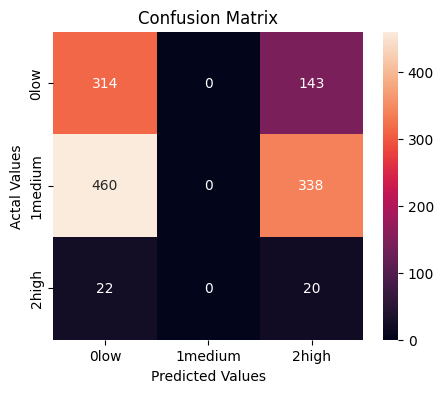

In [59]:
# Creating a dataframe for a array-formatted Confusion matrix,so it will be easy for plotting.
cm_df = pd.DataFrame(cm,
                     index = ['0low','1medium','2high'], 
                     columns = ['0low','1medium','2high'])

#Plotting the confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True, fmt='g')
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


### Accuracy score

number of correct predictions divided by the total number of predictions
Accuracy Score = (TP + TN) / (TP + TN + FP + FN)

Be very careful! When you have imbalance data, where there are more samples or one category than of another, the accuracy score can be misleading.

In [61]:
from sklearn.metrics import accuracy_score

print("Accuracy score:", np.round(accuracy_score(y_test, pred_lr)*100, 2), '%')

Accuracy score: 25.75 %


### Classification report

In [47]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_lr, target_names=["0low","1medium","2high"]))

              precision    recall  f1-score   support

        0low       0.39      0.69      0.50       457
     1medium       0.00      0.00      0.00       798
       2high       0.04      0.48      0.07        42

    accuracy                           0.26      1297
   macro avg       0.14      0.39      0.19      1297
weighted avg       0.14      0.26      0.18      1297



/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zsuzsa/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
